In [4]:
import pandas as pd
df_history = pd.read_csv('..\data\Customer In Stock Dataset Final.csv',encoding= 'unicode_escape')
df_forward = pd.read_csv('..\data\Forward Coverage Dataset Final.csv',encoding= 'unicode_escape' )
df_forward_1 = df_forward[['Date', 'Forecast', 'qty_fulfilled_oh', 'qty_fulfilled_oo', 'qty_fulfilled_if', 'qty_fulfilled_l2']]
df_forward['Actual sales'] = df_forward['Forecast']
df_forward['Covered sales'] = df_forward['qty_fulfilled_oh'] + df_forward['qty_fulfilled_oo'] + df_forward['qty_fulfilled_if'] + df_forward['qty_fulfilled_l2']
df_forward['Missed value'] = df_forward['Actual sales'] - df_forward['Covered sales']
df_forward['instock%'] = df_forward['Covered sales'] / df_forward['Actual sales']
df_forward['Demand'] = df_forward['Forecast'] / df_forward['WholesaleCost']
df_forward_sub = df_forward.loc[:, ['Date', 'SKU', 'suid', 'Country', 'ItemClass', 'ItemMarketingCategory', 'ItemShipClass', 'Actual sales', 'Covered sales', 'Missed value', 'instock%', 'Demand']]
df_foward_sub = df_forward_sub[df_forward_sub['Country'] == 'United States']
df_history = df_history[df_history['Country'] == 'United States']
history = df_history.groupby(['ItemMarketingCategory'])['suid'].nunique()
forward = df_foward_sub.groupby(['ItemMarketingCategory'])['suid'].nunique()
df_history = pd.DataFrame(history.values, index = history.index, columns = ['SupplierCount_his'])
df_forward = pd.DataFrame(forward.values, index = forward.index, columns = ['SupplierCount_for'])
result = pd.concat([df_forward, df_history], axis=1, join="inner")
result['%change'] = (result['SupplierCount_for'] - result['SupplierCount_his']) / result['SupplierCount_his'] * 100
result.sort_values('%change', ascending = False, inplace = True)
result


,SupplierCount_for,SupplierCount_his,%change
ItemMarketingCategory,,,
Unknown,62,33,87.878788
Plumbing - Vanities,117,78,50.000000
Window,62,46,34.782609
Mattresses,160,119,34.453782
Upholstery - Niche,242,186,30.107527
Furniture - Bedroom,491,389,26.221080
Furniture - Home Office,668,540,23.703704
Upholstery - Core,581,488,19.057377
Plumbing - Core,474,407,16.461916


In [9]:
priority_Score = pd.read_csv('../data/final_positive_data.csv',encoding= 'unicode_escape')

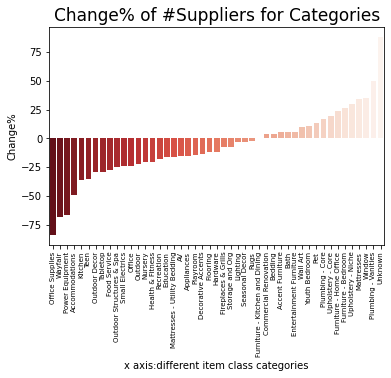

In [10]:

priority_Score = priority_Score.loc[:,['SKU', 'Priority_score', 'ItemMarketingCategory']]

priority_Score = priority_Score.groupby('ItemMarketingCategory')['Priority_score'].mean()
priority_Score = pd.DataFrame(priority_Score.values, index = priority_Score.index, columns = ['priority_score'])
result = pd.concat([result, priority_Score], axis = 1 ,join = 'inner')
result['Metric_After_Priority_Score'] = result['%change'] * result['priority_score']
result.sort_values('Metric_After_Priority_Score', inplace = True)
result.reset_index(inplace = True)

import seaborn as sns
import matplotlib.pyplot as plt
result.head()
result.sort_values('%change', inplace = True)
ax = sns.barplot(x = 'ItemMarketingCategory', y = '%change', data = result, palette='Reds_r')

plt.xticks(rotation=90, fontsize = 7)
plt.ylabel('Change%')
plt.title('Change% of #Suppliers for Categories', fontsize = 17)
# norm = plt.Normalize(result['%change'].min(), result['%change'].max())
# sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
# cbar = plt.colorbar(sm)
plt.xlabel('x axis:different item class categories')
png1 = ax.get_figure()
plt.savefig(f'../plots/supplier change.png', dpi=300, bbox_inches='tight')

In [27]:
df_history = pd.read_csv('../data/Customer In Stock Dataset Final.csv',encoding= 'unicode_escape')
df_forward = pd.read_csv('../data/Forward Coverage Dataset Final.csv',encoding= 'unicode_escape' )
df_forward_1 = df_forward[['Date', 'Forecast', 'qty_fulfilled_oh', 'qty_fulfilled_oo', 'qty_fulfilled_if', 'qty_fulfilled_l2']]
df_forward['Actual sales'] = df_forward['Forecast']
df_forward['Covered sales'] = df_forward['qty_fulfilled_oh'] + df_forward['qty_fulfilled_oo'] + df_forward['qty_fulfilled_if'] + df_forward['qty_fulfilled_l2']
df_forward['Missed value'] = df_forward['Actual sales'] - df_forward['Covered sales']
df_forward['instock%'] = df_forward['Covered sales'] / df_forward['Actual sales']
df_forward['Demand'] = df_forward['Forecast'] / df_forward['WholesaleCost']
df_forward_sub = df_forward.loc[:, ['Date', 'SKU', 'suid', 'Country', 'ItemClass', 'ItemMarketingCategory', 'ItemShipClass', 'Actual sales', 'Covered sales', 'Missed value', 'instock%', 'Demand']]
df_foward_sub = df_forward_sub[df_forward_sub['Country'] == 'United States']
df_history = df_history[df_history['Country'] == 'United States']



,Date,SKU,suid,Country,ItemClass,ItemMarketingCategory,ItemShipClass,Actual sales,Covered sales,Missed value,instock%,Demand
0,2021-01-01,HSNDS1014,20853,United States,Desks,Furniture - Home Office,Small Parcel,11193.757602,0.0,11193.757602,0.0,41.604749
1,2021-05-01,HSNDS1014,20853,United States,Desks,Furniture - Home Office,Small Parcel,10654.512510,0.0,10654.512510,0.0,39.600493
2,2021-02-01,HSNDS1014,20853,United States,Desks,Furniture - Home Office,Small Parcel,9439.970328,0.0,9439.970328,0.0,35.086305
3,2021-02-01,HSNDS1014,20853,United States,Desks,Furniture - Home Office,Small Parcel,9439.970328,0.0,9439.970328,0.0,35.086305
4,2021-08-01,HSNDS1014,20853,United States,Desks,Furniture - Home Office,Small Parcel,8719.154318,0.0,8719.154318,0.0,32.407189


In [45]:
df_forward_sub

,Date,SKU,suid,Country,ItemClass,ItemMarketingCategory,ItemShipClass,Actual sales,Covered sales,Missed value,instock%,Demand
0,2021-01-01,HSNDS1014,20853,United States,Desks,Furniture - Home Office,Small Parcel,11193.757602,0.0,11193.757602,0.0,41.604749
1,2021-05-01,HSNDS1014,20853,United States,Desks,Furniture - Home Office,Small Parcel,10654.512510,0.0,10654.512510,0.0,39.600493
2,2021-02-01,HSNDS1014,20853,United States,Desks,Furniture - Home Office,Small Parcel,9439.970328,0.0,9439.970328,0.0,35.086305
3,2021-02-01,HSNDS1014,20853,United States,Desks,Furniture - Home Office,Small Parcel,9439.970328,0.0,9439.970328,0.0,35.086305
4,2021-08-01,HSNDS1014,20853,United States,Desks,Furniture - Home Office,Small Parcel,8719.154318,0.0,8719.154318,0.0,32.407189
...,...,...,...,...,...,...,...,...,...,...,...,...
6944953,2020-11-01,WDOSF5405,40408,United States,Mugs & Teacups,Tabletop,Small Parcel,0.010664,0.0,0.010664,0.0,0.001356
6944954,2020-11-01,WDOSF5405,40408,United States,Mugs & Teacups,Tabletop,Small Parcel,0.010664,0.0,0.010664,0.0,0.001356
6944955,2020-11-01,WDOSJ2340,40408,United States,Mugs & Teacups,Tabletop,Small Parcel,0.010611,0.0,0.010611,0.0,0.001310
6944956,2020-11-01,WDOSF2714,40408,United States,Mugs & Teacups,Tabletop,Small Parcel,0.010101,0.0,0.010101,0.0,0.001285


In [48]:
df_history

,DateType,Date,SKU,suid,Country,ItemClass,ItemMarketingCategory,ItemShipClass,CustomerInstock_Num,CustomerInstock_Denom,WH_CustomerInstock_Num,WH_CustomerInstock_Denom,Distributor_CustomerInstock_Num,Distributor_CustomerInstock_Denom,WH_LostSales_OOS,DS_LostSales_OOS,WholesaleCostNoRebates
0,Month,2020-08-01,PKOLK1296,28743,United States,Ottomans,Upholstery - Core,Large Parcel,0.000,305.487943,0.0,0.0,0.000,285.122080,0.0,211.804974,NaN
1,Month,2020-07-01,PKOLK1296,28743,United States,Ottomans,Upholstery - Core,Large Parcel,0.000,288.603902,0.0,0.0,0.000,269.363642,0.0,200.098705,NaN
2,Month,2020-06-01,PKOLK1296,28743,United States,Ottomans,Upholstery - Core,Large Parcel,0.000,70.995006,0.0,0.0,0.000,66.262005,0.0,49.223204,NaN
17,Month,2020-06-01,GTSWO1012,58610,United States,Hardwood Flooring,Flooring,Large Parcel,832.167,924.630000,0.0,0.0,770.525,862.988000,0.0,0.000000,621.348
18,Month,2020-04-01,GTSWO1027,58610,United States,Flooring Samples,Flooring,Small Parcel,0.000,0.000000,0.0,0.0,0.000,0.000000,0.0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902657,Month,2020-08-01,FUNQE1058,66243,United States,Shower Heads,Plumbing - Core,Small Parcel,0.000,0.000000,0.0,0.0,0.000,0.000000,0.0,0.000000,NaN
3902658,Month,2020-08-01,FUNQE1045,66243,United States,Bathroom Sink Faucets,Plumbing - Core,Small Parcel,0.000,0.000000,0.0,0.0,0.000,0.000000,0.0,0.000000,NaN
3902659,Month,2020-08-01,FUNQE1039,66243,United States,Fixture Parts And Components,Plumbing - Core,Small Parcel,0.000,0.000000,0.0,0.0,0.000,0.000000,0.0,0.000000,NaN
3902660,Month,2020-08-01,YBTMQ1002,66243,United States,Kitchen Sinks,Plumbing - Core,Small Parcel,0.000,0.000000,0.0,0.0,0.000,0.000000,0.0,0.000000,NaN


In [66]:
df_itemclass_his = df_history.loc[df_history['ItemMarketingCategory'] == 'Outdoor Structures & Spa', ['ItemClass', 'suid']]
df_itemclass_his = df_itemclass_his.groupby('ItemClass')['suid'].nunique()
df_itemclass_his = pd.DataFrame(df_itemclass_his.values, index = df_itemclass_his.index, columns =['SUIDCOUNT_HIS'])
df_itemclass_his

,SUIDCOUNT_HIS
ItemClass,
Arbors,29
Awnings,25
Canopies,6
Canopies & Gazebos,95
Compost,27
Coolers,77
Deck Boxes,44
Fencing & Accessories,64
Fencing Accessories,17


In [67]:
df_itemclass_for = df_forward_sub.loc[df_forward_sub['ItemMarketingCategory'] == 'Outdoor Structures & Spa', ['ItemClass', 'suid']]
df_itemclass_for = df_itemclass_for.groupby('ItemClass')['suid'].nunique()
df_itemclass_for = pd.DataFrame(df_itemclass_for.values, index = df_itemclass_for.index, columns =['SUIDCOUNT_FOR'])
df_itemclass_for

,SUIDCOUNT_FOR
ItemClass,
Arbors,17
Awnings,19
Canopies,3
Canopies & Gazebos,77
Compost,16
Coolers,42
Deck Boxes,27
Fencing & Accessories,39
Fencing Accessories,6


In [69]:
df_itemclass = df_itemclass_his.join(df_itemclass_for)

In [70]:
df_itemclass['%change'] = (df_itemclass['SUIDCOUNT_FOR'] - df_itemclass['SUIDCOUNT_HIS'])/df_itemclass['SUIDCOUNT_HIS'] *100
df_itemclass.sort_values('%change')

,SUIDCOUNT_HIS,SUIDCOUNT_FOR,%change
ItemClass,,,
Fencing Accessories,17,6,-64.705882
Greenhouse Accessories,21,8,-61.904762
Shed Accessories,10,4,-60.000000
Hot Tub Accessories,17,8,-52.941176
Pergolas,23,11,-52.173913
Canopies,6,3,-50.000000
Coolers,77,42,-45.454545
Outdoor Showers,14,8,-42.857143
Arbors,29,17,-41.379310
